In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

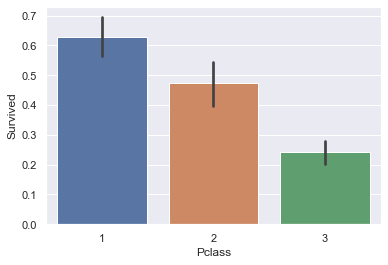

In [8]:
sns.barplot(x='Pclass', y='Survived',data=train_df)

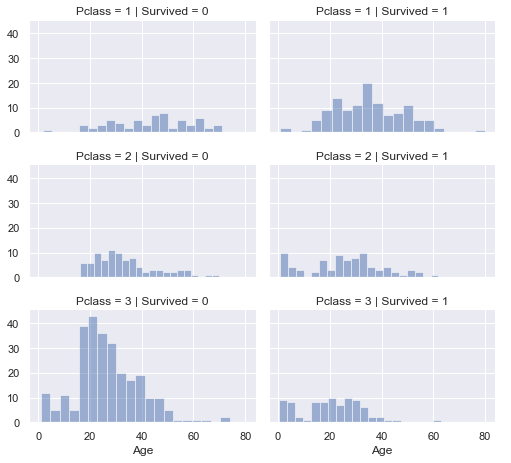

In [9]:
grid = sns.FacetGrid(train_df, row='Pclass',col='Survived',height=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

In [10]:
data = [train_df,test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives']>0, 'not_alone'] =0
    dataset.loc[dataset['relatives']==0, 'not_alone']=1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [11]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [12]:
import re
deck = {'A':1,"B":2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}
data = [train_df,test_df]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [13]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8


In [14]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [15]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [16]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std, size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train_df['Age'].astype(int)

In [17]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
common_value = 'S'
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [19]:
data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [20]:
data = [train_df, test_df]
titles = {'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Rare':5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr'\
                                                   'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)
    


In [21]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'],axis=1)

In [22]:
genders = {'male':0,'female':1}
data = [train_df,test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [23]:
train_df = train_df.drop(['Ticket'],axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [24]:
ports = {'S':0,'Q':1,'C':2}
data = [train_df,test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [25]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11,'Age'] =0
    dataset.loc[(dataset['Age']>11) & (dataset['Age'] <=18),'Age'] =1
    dataset.loc[(dataset['Age']>18) & (dataset['Age'] <= 22), 'Age']=2
    dataset.loc[(dataset['Age']>22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age']>27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age']>33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age']>40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[(dataset['Age']>66), 'Age'] = 6
    

In [26]:
train_df['Age'].value_counts()

6    161
4    161
5    155
3    129
2    118
1     99
0     68
Name: Age, dtype: int64

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250 ,'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [28]:
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [29]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_class'] = dataset['Age'] * dataset['Pclass']

In [30]:
for dataset in data:
    dataset['Fare_per_person'] = dataset['Fare'] / (dataset['relatives']+1)
    dataset['Fare_per_person'] = dataset['Fare_per_person'].astype(int)
    

In [31]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,2,1,0,3,2,5,1
2,1,3,1,3,0,0,0,0,0,1,8,3,9,0
3,1,1,1,5,1,0,3,0,1,0,3,2,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Survived         891 non-null    int64
 1   Pclass           891 non-null    int64
 2   Sex              891 non-null    int64
 3   Age              891 non-null    int32
 4   SibSp            891 non-null    int64
 5   Parch            891 non-null    int64
 6   Fare             891 non-null    int32
 7   Embarked         891 non-null    int64
 8   relatives        891 non-null    int64
 9   not_alone        891 non-null    int32
 10  Deck             891 non-null    int32
 11  Title            891 non-null    int32
 12  Age_class        891 non-null    int64
 13  Fare_per_person  891 non-null    int32
dtypes: int32(6), int64(8)
memory usage: 76.7 KB


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PassengerId      418 non-null    int64
 1   Pclass           418 non-null    int64
 2   Sex              418 non-null    int64
 3   Age              418 non-null    int32
 4   SibSp            418 non-null    int64
 5   Parch            418 non-null    int64
 6   Fare             418 non-null    int32
 7   Embarked         418 non-null    int64
 8   relatives        418 non-null    int64
 9   not_alone        418 non-null    int32
 10  Deck             418 non-null    int32
 11  Title            418 non-null    int32
 12  Age_class        418 non-null    int64
 13  Fare_per_person  418 non-null    int32
dtypes: int32(6), int64(8)
memory usage: 36.0 KB


In [34]:
X_train = train_df.drop(['Survived'],axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'],axis=1).copy()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [36]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train,Y_train)

SGDClassifier(max_iter=5, tol=None)

In [37]:
Y_pred = sgd.predict(X_test)

In [38]:
sgd.score(X_train,Y_train)

0.44668911335578004

In [39]:
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
print(acc_sgd)

44.67


In [40]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_rf = round(random_forest.score(X_train,Y_train)*100,3)

In [41]:
print(acc_rf)

92.817


In [42]:
logr = LogisticRegression(max_iter=150)
logr.fit(X_train,Y_train)
y_pred = logr.predict(X_test)
acc_logr = round(logr.score(X_train,Y_train)*100,3)
print(acc_logr)

81.145


In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,3)
print(acc_knn)

86.981


In [44]:
gn = GaussianNB()
gn.fit(X_train,Y_train)
y_pred = gn.predict(X_test)
acc_gn = round(gn.score(X_train,Y_train)*100,3)
print(acc_gn)

78.563


In [45]:
per = Perceptron(max_iter=10)
per.fit(X_train,Y_train)
y_pred = per.predict(X_test)
acc_per = round(per.score(X_train,Y_train)*100,3)
print(acc_per)

80.808


C:\Users\Yusuf\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [46]:
linear_svc = LinearSVC(max_iter=2000)
linear_svc.fit(X_train,Y_train)
y_pred = linear_svc.predict(X_test)
acc_ls = round(linear_svc.score(X_train,Y_train)*100,3)
print(acc_ls)

80.92


C:\Users\Yusuf\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [47]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,Y_train)
y_pred = dec_tree.predict(X_test)
acc_dec_tree = round(dec_tree.score(X_train,Y_train)*100,3)

In [48]:
print(acc_dec_tree)

92.817


In [49]:
results = pd.DataFrame({'Model':['Support Vector Machine','KNN','Logistic Regression','Random Forest'
                                ,'Naive Bayes','Perceptron','Decision Tree','Stochastic Gradient Decent'],
                        'Scores':[acc_ls,acc_knn,acc_logr,acc_rf,acc_gn,acc_per,acc_dec_tree,acc_sgd]})
results_df = results.sort_values(by='Scores',ascending=False)
results_df = results_df.set_index('Scores')
results_df.head(9)

,Model
Scores,
92.817,Random Forest
92.817,Decision Tree
86.981,KNN
81.145,Logistic Regression
80.920,Support Vector Machine
80.808,Perceptron
78.563,Naive Bayes
44.670,Stochastic Gradient Decent


In [50]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.76666667 0.80898876 0.75280899 0.83146067 0.87640449 0.85393258
 0.84269663 0.79775281 0.86516854 0.86516854]
Mean: 0.8261048689138576
Standard Deviation: 0.04081952008183482


In [51]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.206
Sex,0.165
Age_class,0.092
Deck,0.083
Age,0.077
Pclass,0.076
Fare,0.068
Embarked,0.060
relatives,0.055


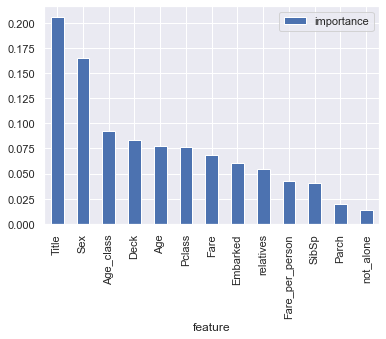

In [52]:
importances.plot.bar()

In [53]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)


In [54]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.82 %


In [55]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.6 %


In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[489,  60],
       [ 90, 252]], dtype=int64)

In [57]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8076923076923077
Recall: 0.7368421052631579


In [58]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7706422018348624